In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [89]:
import numpy as np
import scipy.stats as ss

In [102]:
n_bins = 100
n_toys = 200
x = np.linspace(1000,7000,n_bins)

In [103]:
true_dist = 1.E5*np.exp(-x/500)
obs_dist = np.random.poisson(true_dist)

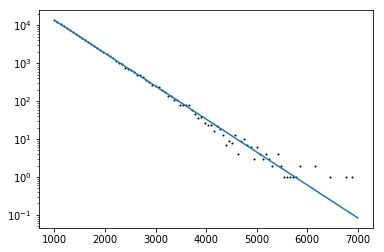

In [104]:
plt.plot(x, true_dist)
plt.scatter(x, obs_dist, s=1, color='black')
plt.yscale('log')

In [222]:
def JES(x, a, b):
    #oops had A, B reversed
    #A is for high mass
    A= 0.15
    B = 0.05
    return 1.+A*a*x**4 + B*b*(1.-x)

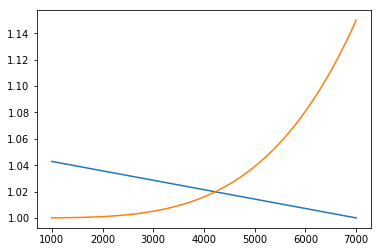

In [223]:
plt.plot(x, JES(x/np.max(x),0,1))
plt.plot(x, JES(x/np.max(x),1,0))

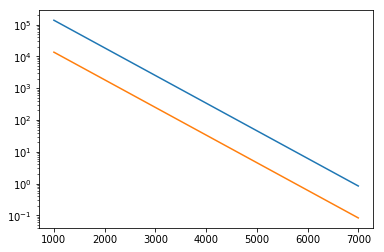

In [224]:
modelMatrix_mean=np.zeros([n_toys, n_bins])

#Original JES calculation
for bi in range(n_toys):
    #print bi
    a = np.random.randn(1)
    b = np.random.randn(1)
    mod = true_dist

    #In original code, I think xs and zs were basically the same
    xs = x
    zs = x
    #we need a double loop, this is only considering a slice
    gaus = ss.norm.pdf(xs, zs*JES(zs/max(zs), a, b), 0.02*zs)
    t = gaus*mod 
    #original had different shape newycounts = np.sum(t, axis=1)
    newycounts = np.sum(t)
    #In original code, I think nxe was counts for extended model.
    nxe = true_dist
    newycounts = newycounts*nxe #I don't understand why this is multipleid again. Already had gaus*mod
    modelMatrix_mean[bi,:]= newycounts 

plt.plot(x, modelMatrix_mean[0,:])
plt.plot(x, true_dist)
plt.yscale('log')
# problem: true dist and JES distribution look nothing like eachother... 
# double multiplication problem?
# also missing double loop

(1198.3286109994908, 1198.3293154832672)


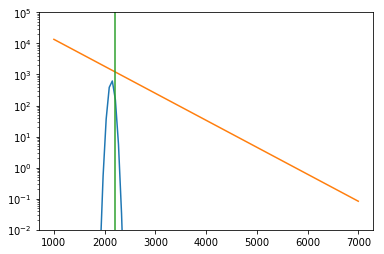

In [225]:
modelMatrix_mean=np.zeros([n_toys, n_bins])

testing = True
test_bin = 20

#New JES calculation
for bi in range(1):
    #print bi
    a = np.random.randn(1)
    b = np.random.randn(1)
    mod = true_dist

    test_bin = 20
    testing = True
    #testing.. 
    if testing:
        a=0. #high mass JES
        b=-1. #low mass JES
        mod = mod*0
        mod[test_bin]=true_dist[test_bin]

    
    #In original code, I think xs and zs were basically the same
    xs = x
    zs = x
    binwidth = xs[1]-xs[0]
    #we need a double loop.
    # here is a half pythonic way of doing it.
    # we will loop over the z values and apply the JES smearing to the entire x axis
    newycounts = np.zeros(n_bins)
    for i, zi in enumerate(zs):
        gaus = ss.norm.pdf(xs, zi*JES(zi/max(zs), a, b), 0.02*zi)
        newycounts = newycounts + mod[i]*gaus
    newycounts = newycounts * binwidth
    modelMatrix_mean[bi,:]= newycounts 
    
    
plt.plot(x, modelMatrix_mean[0,:])
plt.plot(x, true_dist)

if testing:
    print(true_dist[test_bin], np.sum(modelMatrix_mean[0,:]))
    plt.plot((x[test_bin],x[test_bin]), (1E-2, 1E5))


plt.ylim(1E-2,1E5)
plt.yscale('log')

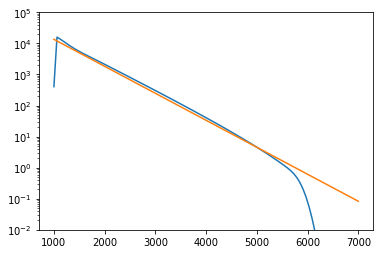

In [226]:
modelMatrix_mean=np.zeros([n_toys, n_bins])

#New JES calculation
for bi in range(n_toys_with_testing):
    #print bi
    a = np.random.randn(1)
    b = np.random.randn(1)
    mod = true_dist

    #In original code, I think xs and zs were basically the same
    xs = x
    zs = x
    binwidth = xs[1]-xs[0]
    #we need a double loop.
    # here is a half pythonic way of doing it.
    # we will loop over the z values and apply the JES smearing to the entire x axis
    newycounts = np.zeros(n_bins)
    for i, zi in enumerate(zs):
        gaus = ss.norm.pdf(xs, zi*JES(zi/max(zs), a, b), 0.02*zi)
        newycounts = newycounts + mod[i]*gaus
    newycounts = newycounts * binwidth
    modelMatrix_mean[bi,:]= newycounts 
    
plt.plot(x, modelMatrix_mean[0,:])
plt.plot(x, true_dist)
plt.ylim(1E-2,1E5)
plt.yscale('log')

In [227]:
def plot_cov(X, C, K, stationary=True):
    K = K #+ 1e-8*np.eye(X.shape[0])
    x = X.flatten()
    
    fig = plt.figure(figsize=(14,5))
    ax1 = fig.add_subplot(131)
    m = ax1.imshow(C, cmap="inferno",
                   interpolation='none',
                   extent=(np.min(X), np.max(X), np.max(X), np.min(X)));
    plt.colorbar(m);
    ax1.set_title("Correlation Matrix")
    ax1.set_xlabel("X")
    ax1.set_ylabel("X")

    ax2 = fig.add_subplot(132)
    m = ax2.imshow(np.log(K), cmap="inferno",
                   interpolation='none',
                   extent=(np.min(X), np.max(X), np.max(X), np.min(X)));
    plt.colorbar(m);
    ax2.set_title("Log(Covariance Matrix)")
    ax2.set_xlabel("X")
    ax2.set_ylabel("X")
    
    ax3 = fig.add_subplot(133)
    m = ax3.imshow(K, cmap="inferno",
                   interpolation='none',
                   extent=(np.min(X), np.max(X), np.max(X), np.min(X)));
    plt.colorbar(m);
    ax3.set_title("Covariance Matrix")
    ax3.set_xlabel("X")
    ax3.set_ylabel("X")
    
    fig = plt.figure(figsize=(13,5))
    ax = fig.add_subplot(111)
    if not stationary:
        ax.plot(x, np.diag(K), "k", lw=2, alpha=0.8)
        ax.set_title("The Diagonal of K")
        ax.set_ylabel("k(x,x)")
        ax.set_xscale('log')
        ax.set_yscale('log')
    else:
        ax.plot(x, K[:,0], "k", lw=2, alpha=0.8)
        ax.set_title("K as a function of x - x'")
        ax.set_ylabel("k(x,x')")
    ax.set_xlabel("X")

def plot_cor(X, C, stationary=True):
    #K = K #+ 1e-8*np.eye(X.shape[0])
    x = X.flatten()
    fig = plt.figure(figsize=(6,5))
    m = plt.imshow(C, cmap="bwr",
                   interpolation='none',
                   #vmin=-1, vmax=1,
                   aspect='auto',
                   extent=(np.min(X), np.max(X), np.max(X), np.min(X)));
    cbar = plt.colorbar(m)
    m.set_clim(vmin=-1, vmax=1)
    cbar.ax.tick_params(labelsize=20) 
    plt.title("Correlation Matrix", fontsize=20)
    plt.xlabel("Mass [TeV]", fontsize=20)
    plt.ylabel("Mass [TeV]", fontsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.tick_params(axis='x', labelsize=20)
    labels = ["2","3","4","5","6","7"]
    plt.xticks([2000, 3000, 4000, 5000, 6000, 7000], labels)
    plt.yticks([2000, 3000, 4000, 5000, 6000, 7000], labels)
    
def plot_individualCov(C, K):
    fig = plt.figure(figsize=(14,5))
    ax1 = fig.add_subplot(131)
    for i in range(len(K[1])):
        ax1.plot(xvalO,(K[i,:]))
    ax1.semilogy()
    ax1.set_title("Covariance vs mjj")
    
    ax2 = fig.add_subplot(132)
    #ax2.semilogy()
    for i in range(len(C[1])):
        plt.plot(xvalO,C[i,:])
    ax2.set_title("Correlation vs mjj")
    
    ax3 = fig.add_subplot(133)
    ax3.plot(xvalO,(K[5,:]), c='r', label="Covariance for bin 5")
    ax3.plot(xvalO,(K[40,:]), c='g', label="Covariance for bin 40")
    ax3.plot(xvalO,(K[75,:]),c='b', label = "Covariance for bin 75")
    ax3.legend()
    ax3.semilogy()

In [228]:
covMat_mean = np.cov(modelMatrix_mean[:,11:].T)
corMat_mean = np.corrcoef(modelMatrix_mean[:,11:].T)

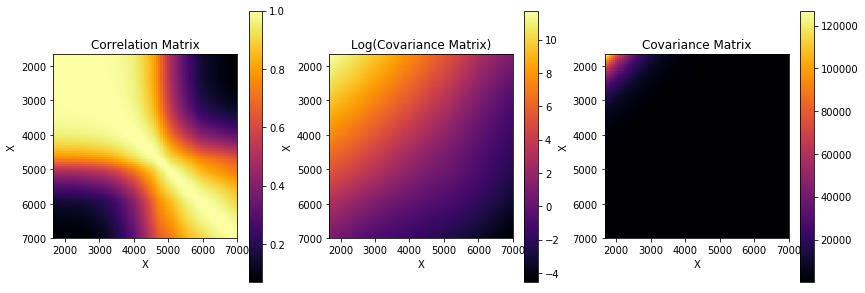

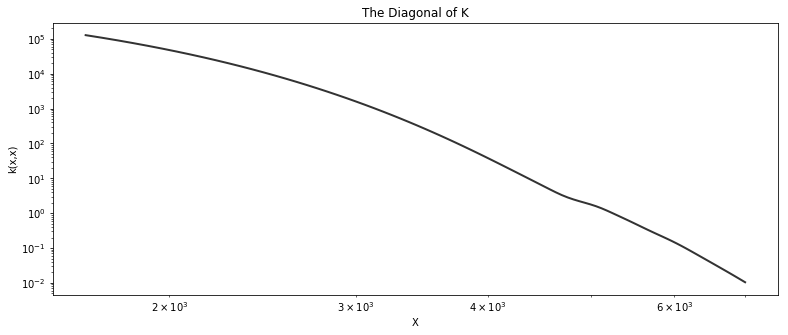

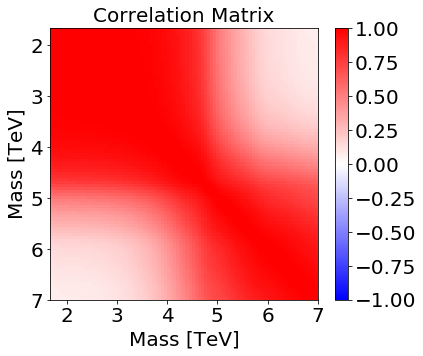

In [229]:
nx=x
plot_cov(nx[11:].reshape(-1,1), corMat_mean, covMat_mean, False)
plot_cor(nx[11:].reshape(-1,1), corMat_mean, False)

In [230]:
testing

True

In [231]:
np.min(corMat_mean), np.min(covMat_mean)

(0.068578204672129453, 0.01043827070134438)